# The Bootstrap

In [54]:
set.seed(1)
library(boot)

In [55]:
## loading the data
Penn <- as.data.frame(read.table("../Workgroup 5/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg== 4| tg==0)
attach(Penn)

The following objects are masked from Penn (pos = 3):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg



In [56]:
## Creating T4
T4<- (tg==4)

In [57]:
dim(Penn)

[1] 5099   23

## Estimating the Accuracy of a Linear Regression Model

The bootstrap approach can be used  to assess the
variability of the coefficient estimates and predictions from a statistical learning method. Here we use the bootstrap approach in order to assess the variability of
the estimates for $\beta_1$, $\beta_2$ and $\beta_3$, the intercept and slope terms for the linear regression model
that uses  a set of differents variables to predict `log(inuidur1)` in the `Penn` data set. We will compare the estimates obtained using the bootstrap to those obtained using the formulas
for ${\rm SE}(\hat{\beta}_1)$, ${\rm SE}(\hat{\beta}_2)$ and ${\rm SE}(\hat{\beta}_3)$ described
in Section 3.1.2.

We first create a simple function, `boot.fn()`, which takes in the
`Penn` data set as well as a set of indices for the observations, and
returns the intercept and slope estimates for the linear regression model. We then apply this function
to the full set of $5099$ observations in order to compute the estimates of $\beta_1$ $\beta_2$ and $\beta_3$ on the entire data set using the usual linear regression coefficient estimate
formulas from Chapter 3. Note that we do not need the `{` and `}` at the beginning and end of the function because it is only one line long.

In [58]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,10607,4,9,9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [60]:
boot.fn <- function(data, index)
  coef(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = data, subset = index))

In [61]:
lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = Penn)


Call:
lm(formula = log(inuidur1) ~ T4 + (female + black + othrace + 
    factor(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + 
    durable + lusd + husd), data = Penn)

Coefficients:
 (Intercept)        T4TRUE        female         black       othrace  
    2.178462     -0.071692      0.126368     -0.293768     -0.472445  
factor(dep)1  factor(dep)2            q2            q3            q4  
    0.029867      0.096187      0.073678     -0.038507     -0.054949  
          q5            q6       agelt35       agegt54       durable  
   -0.144178      0.003361     -0.162772      0.229667      0.126557  
        lusd          husd  
   -0.175353     -0.105225  


In [62]:
boot.fn(Penn, 1:5099)

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
 2.178462326 -0.071692484  0.126368328 -0.293767980 -0.472445058  0.029866899 
factor(dep)2           q2           q3           q4           q5           q6 
 0.096186517  0.073678072 -0.038506537 -0.054949195 -0.144177912  0.003361318 
     agelt35      agegt54      durable         lusd         husd 
-0.162772168  0.229666708  0.126557359 -0.175352572 -0.105224727

 The `boot.fn()` function can also be used in order to create
 bootstrap estimates for the intercept and slope terms by randomly sampling from among the observations with replacement. Here we give two examples.

In [63]:
sample(1:5099, 1000, replace = T)

[1] 1017 4775 2177 5026 1533 4567 2347  270 4050 3379 4065  597 1301  330
  [15] 1799 3913 1749   37 1129  729  878  485 4012 5071 2849 2900 2378 4650
  [29] 1446 2159 3476 1948 2580 1530 4439 4136 4633 4344 1222 2426 2087 2483
  [43] 2858 1696  526 1069   22 1128  983 1791 3910 1639 4939  465 5092 1200
  [57] 3863 1134   84 1895 3101 2300 3990 1948 1328  557  287 3217 3702 1522
  [71]  858 4672  990 3175  316  733 4907 5051 2330 1167 3514 3992 1706  501
  [85] 3788  536 5084 3286 3747   29 3662 1942 4934 1820 2281 1317 4669 1966
  [99]  369 2499 4182  355 1073  361 1340 1266 1841 2866 4343  751  219  135
 [113] 4207  532 4504 3123  912 3428 2178 4455 2153 1148 1101 1242 3682 1218
 [127] 4115  273  418  867 4782 4499 3821 1611  818 2652 4730  664 3210  719
 [141]  500 3045 2809  423  421  989 4236 4222 3598 3580 5094 3700 2319 1154
 [155] 2625 3523  504 4454  785 3796 3912 1572 4401 1833 2461 5077 2624 4225
 [169]  309 2922 4078  441 2904 3189 4405  470 3686 1360 1822 1790  349 3144
 [183]  894 4686 1956  474  421 5048  455 3700 3306 3556 3193   15 3366 4158
 [197] 4486 1668 1059 4477 1129 2597 4096 2012 4084 2110 1172  797 2858 1596
 [211] 4072 5057 4430 2079 3372 2762  610 3354 1265 3068 4182 2265 2840 2156
 [225]  751 1760 4664 5098 4839 4059 4075 3506 2964 3421 3586 4212 2043 3070
 [239] 1463 1221 3292  462 1957 2283 4049 1498 2221 3937 1498 4503 2033  731
 [253] 4281 2813 3805 4589 4771 3914  966 2492 1191 2017 3774  291 3979 4749
 [267]  247 2482 3388 3418 2984 2722 2884   56  934 3153 4425 4590 4425 2966
 [281] 3552 2152 4257 2432  127 4356  717 4156 2496 4277 1452 3997 4387  676
 [295] 1993 4707  148 4246  121  169  598 1491 4204 2815 2578 1580 3869 1115
 [309] 3616 3551 4147 2167 2513 1783  436 2137  533 4092 1381 2752  846  219
 [323]  858 3486 3565  570 1926 1813 2833 3189 1498 1858 4729  281 4063 4730
 [337]  724 2053 1354  492 3255 4664 1949  514 2117 4666 1253 2016 2189 2841
 [351]  132 5094 1659 2802 2181 4846 1421 2312 2643 5040 1839 3505 1838 1766
 [365] 1544  320 4948 4211 3525 1474 1242 4978 3917 2167 2543 2018 1822  109
 [379] 3760 2587  753 4907  393  648 4141 4208 5036 4318 4254 4225 2822 1937
 [393] 3388 3789 5046 2778 2016 3940 4396 3333 1139 4436 4508   99 3200 3822
 [407] 2542 4879 3042 1190 1459 1776  116 2948 3157 1749 1326 1847 1232 1018
 [421]  383  728 3349  771 2906  484 4599 3222 3887 2563 2800 3588 1700   58
 [435] 3380 1509 4801 3183 2021 4438 2170 4140 3700 1803 1414 3120 1124  313
 [449] 2004  822 3787 3382 3157   81 3328 3126 2194 2796 2775 1401  435 3330
 [463] 1786 3360  234 4392 4411 3926 4813 1779 2178 3471 2615 4278   61 4606
 [477] 1089  649 3505 1861  219 2114 2649 2775 2992 3452 3797 4549 1177   17
 [491] 1057 3706 2257 1525 3415 4720 2079  795  573 3037 3298 2744 3558 4568
 [505] 2351 3651 4898 2298 1871 1694 5034 5005  363 3236  624 3932 2573 1267
 [519] 4690 3329 2373  702 1378  959 4378 2273 4115 1489  397 5031 3044 4182
 [533]  744  564 4574 1592 2290 3482 3459   87 4313  860 2446  628 2399 1104
 [547] 1493 4140 4062 3926 1518 4784 2811 1473 2572 4572 4364 1177 4402 2137
 [561]  671 4933 2569 1218 4745 2551  128 3497 3350 1435  102 3644 4066 3004
 [575] 3457 2370 2678 2973  453 2402 4585 3468 1129  815  574 4109  644 4402
 [589]   48 3437 1174 2608 3854 1529 4358 1590 4693 3352  835 2280 1550 4123
 [603] 2899 1821  573 4165  601 1759  718 2107 4343 1019 2020 3924  543 2563
 [617]  296 1930 4557  764 1734 1354  122 3047  498 1043  376 4562 3255 2734
 [631]  919 1242 1487 1366 4673  854  525 1814 2490  108 4137 2145 3862 4221
 [645] 3018 2285 4435 2056  396 2507  144 1835 3733 3290  252 2504 2069 3591
 [659] 4963 2346 4897  133 1803 1641  386 1802  290  770  902 2158 4666 4297
 [673]  487 2053 2513 3254 1421  908 3363 1800 3714 4286  247 2362  457  991
 [687] 3130 4222  583 4279  647 4007 2732  492 3807 3586 1620 3129  553 1780
 [701] 1864 4633 1443 1787 2037 4030 3408 1031 2265 4330 3027 2298 2531 3417
 [715] 2573 2608 1587 4590 1651 3402 1630  672 2136 4364 4488  151 1524 4085

In [245]:
set.seed(1)
boot.fn(Penn, sample(5099, 1000, replace = T))
boot.fn(Penn, sample(5099, 1000, replace = T))
#What you it is doing is randomly picking 1000 numbers.

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
  2.39724518  -0.10606770   0.14225248  -0.27600772  -0.45140160  -0.07624853 
factor(dep)2           q2           q3           q4           q5           q6 
  0.15348586  -0.09842108  -0.29094552  -0.31287219  -0.17147188   0.05808136 
     agelt35      agegt54      durable         lusd         husd 
 -0.21371173   0.21017104   0.18342842  -0.27140147  -0.14766157

(Intercept)       T4TRUE       female        black      othrace factor(dep)1 
 1.733117695 -0.165436031  0.122953801 -0.507489983 -1.154040069  0.035653620 
factor(dep)2           q2           q3           q4           q5           q6 
-0.099240033  0.436967715  0.447916575  0.405304671  0.196369243  0.392163731 
     agelt35      agegt54      durable         lusd         husd 
 0.001248154  0.245271404  0.155887147 -0.139015302 -0.055485682

Remember that $\hat{\beta}_1$, $\hat{\beta}_2$ and $\hat{\beta}_3$ are "T4", "female" and "black" respectively.

Next, we use the `boot()` function to compute the standard errors of 1,000 bootstrap estimates for the intercept and slope terms.

In [246]:
boot(Penn, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  1.209997e-03  0.15471726
t2*  -0.071692484 -3.510495e-04  0.03553095
t3*   0.126368328  8.070346e-04  0.03520866
t4*  -0.293767980  6.096265e-04  0.06033652
t5*  -0.472445058 -5.162676e-03  0.24331273
t6*   0.029866899  7.853357e-04  0.05553816
t7*   0.096186517 -1.124077e-03  0.04532528
t8*   0.073678072 -1.150913e-03  0.15232225
t9*  -0.038506537 -4.651619e-04  0.15007529
t10* -0.054949195 -9.525993e-04  0.15103075
t11* -0.144177912 -1.663694e-03  0.15016489
t12*  0.003361318 -3.922960e-03  0.16129317
t13* -0.162772168  1.760311e-03  0.03817397
t14*  0.229666708  2.456610e-04  0.05824650
t15*  0.126557359  4.910177e-05  0.04851241
t16* -0.175352572 -6.415924e-04  0.04093507
t17* -0.105224727 -7.371794e-04  0.04518757

In [205]:
Boot <- boot(Penn, boot.fn, 1000)

This indicates that the bootstrap estimate for ${\rm SE}(\hat{\beta}_1)$ is $0.3553$, the bootstrap estimate for ${\rm SE}(\hat{\beta}_2)$ is $0.0352$, and the bootstrap estimate for ${\rm SE}(\hat{\beta}_3)$ is $0.0603$
As discussed in Section 3.1.2, standard formulas can be used to compute the standard errors for the regression coefficients in a linear model. These can be obtained using the  `summary()` function.

In [248]:
summary(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = Penn))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.178462326,0.15901507,13.69972271,5.631260e-42
T4TRUE,-0.071692484,0.03546326,-2.02159887,4.327012e-02
female,0.126368328,0.03482493,3.62867401,2.876799e-04
black,-0.293767980,0.05297556,-5.54534899,3.081966e-08
othrace,-0.472445058,0.19839750,-2.38130547,1.728801e-02
factor(dep)1,0.029866899,0.05414025,0.55165799,5.812070e-01
factor(dep)2,0.096186517,0.04686228,2.05253621,4.016868e-02
q2,0.073678072,0.15682593,0.46980799,6.385124e-01
q3,-0.038506537,0.15647802,-0.24608272,8.056281e-01
q4,-0.054949195,0.15656019,-0.35097809,7.256193e-01


In [249]:
Reg <- summary(lm(log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = Penn))$coef

In [250]:
library(xtable)
table<- matrix(0, 3, 4)
table[1,1]   <- Reg[2]
table[2,1]   <- Reg[3]
table[3,1]   <- Reg[4]


table[1,2]   <- Reg[2,2]
table[2,2]   <- Reg[3,2]
table[3,2]   <- Reg[4,2]


table[1,3]   <- Boot$t0[2]
table[2,3]   <- Boot$t0[3]
table[3,3]   <- Boot$t0[4]


table[1,4]   <- 0.03553095
table[2,4]   <- 0.03520866
table[3,4]   <- 0.06033652

colnames(table)<- c("Coef_normal_reg", "S.E_normal_reg","Coef_boot","S.E_boot")
rownames(table)<- c("T4","Female", "Black")
tab <- xtable(table, digits =3)
print(tab,type="latex") # set type="latex" for printing table in LaTeX
tab

% latex table generated in R 3.6.1 by xtable 1.8-4 package
% Fri Nov 12 17:13:05 2021
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & Coef\_normal\_reg & S.E\_normal\_reg & Coef\_boot & S.E\_boot \\ 
  \hline
T4 & -0.072 & 0.035 & -0.072 & 0.036 \\ 
  Female & 0.126 & 0.035 & 0.126 & 0.035 \\ 
  Black & -0.294 & 0.053 & -0.294 & 0.060 \\ 
   \hline
\end{tabular}
\end{table}


,Coef_normal_reg,S.E_normal_reg,Coef_boot,S.E_boot
T4,-0.07169248,0.03546326,-0.07169248,0.03553095
Female,0.12636833,0.03482493,0.12636833,0.03520866
Black,-0.29376798,0.05297556,-0.29376798,0.06033652


The standard error estimates for $\hat{\beta}_1$,
$\hat{\beta}_2$ and $\hat{\beta}_3$ obtained from
the normal regresion are $0.0355$ for T4, $0.3482$
for female and $0.0530$ for black. Interestingly, these are somewhat different from the
estimates obtained using the bootstrap.  Does this indicate a problem
with the bootstrap? In fact, it suggests the opposite.  Recall that
the standard regresion rely on certain assumptions. For example, they depend
on the unknown parameter $\sigma^2$, the noise variance. We then estimate $\sigma^2$
using the RSS. Now although the formulas for the standard errors do not rely on the linear model
being correct, the estimate for $\sigma^2$ does.
We see in
.
 The bootstrap approach does not rely on any assumptions, and so it is
likely giving a more accurate estimate of the standard errors of
$\hat{\beta}_1$, $\hat{\beta}_2$ and $\hat{\beta}_3$ than is the `summary()`
function.

Below we compute the bootstrap standard error estimates and the standard
linear regression estimates that result from fitting the quadratic model to the data. Since this model provides a good fit to the data, there is now a better correspondence between the bootstrap estimates and the standard estimates of ${\rm SE}(\hat{\beta}_1)$, ${\rm SE}(\hat{\beta}_2)$ and ${\rm SE}(\hat{\beta}_3)$.

# HTE I: Binary treatment

## Experiment Description

We analyze the Pennsylvania re-employment bonus experiment. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. This time, we will focus on the **treatment four**.So we will assign to an individual $(W_i = 1)$ if it is treated.

## Model 
We will try to evaluate the impact of the **treatment four** on unemployment duration. $Y$ is  the  log of duration of unemployment (inudir1) , $W$ is a treatment  indicator ($W_i$ if it is treated),  and $X$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation. If the RCT assumptions hold rigorously, we could estimate the ATE  ($\beta_1$) in the following equation would be the regression model:

$$
Y_i =  W_i \beta_1 + X_i'\beta_2 + \varepsilon, \quad , E (W_i,X_i') = 0,
$$


## Analysis

The average treatment effect (ATE) may obscure important details about how different **groups** of individuals react to the treatment, as we have seen in the heteregenous model. We can calculate this using the  **conditional average treatment effect (CATE)**,


\begin{equation}
  \tau(x) := E[Y_i(1) - Y_i(0) | X_i = x],     (1)
\end{equation}


which is a "localized" version of the average treatment effect conditional on a vector of observable characteristics. 

It's often the case that (1) is too general to be immediately useful, especially when the observable covariates are high-dimensional. It can be hard to estimate reliably without making strong modeling assumptions, and hard to summarize in a useful manner after estimation. In such situations, we will instead try to estimate treatment effect averages for **simpler groups**

\begin{equation}
  E[Y_i(1) - Y_i(0) | G_i = g],
\end{equation}

where $G_i$ indexes subgroups of interest. In this case, our subgroup is **female participants.**

If we were running a simple regression, we shall introduce interactions of the variable (in this case, sex) with the treatment. This way, defining sex as $G_i$ (where $G_i=1$ if the person is a woman) , and excluding this variable from $X_i$, we have the following regression model:

$$
Y_i =  W_i \beta_1 + G_i \alpha_1 + W_i G_i \alpha_2  + X'\beta_2 + \varepsilon, \quad , E (W_i,X_i') = 0
$$

This way, $\beta_1 + \alpha_1 + \alpha_2$ would determine the effect the treatment has on the women. 

### 1. Run an OLS regression to find the HTE of female*T4 with the HC2 correction.

In [55]:
# Read in data

## loading the data
data <- as.data.frame(read.table(".../data/penn_jae.dat", header=T ))
data <-subset (data, tg==4 | tg==0)
data$tg[data$tg == 4] <- 1
data$outcome[data$inuidur1 >0] <-log(inuidur1)

attach(data)
head (data)

The following object is masked _by_ .GlobalEnv:

    outcome


The following objects are masked from data (pos = 3):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, outcome,
    q1, q2, q3, q4, q5, q6, recall, tg


The following objects are masked from data (pos = 4):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from data (pos = 18):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg


The following objects are masked from data (pos = 19):

    abdt, agegt54, agelt35, black, dep, durable, female, hispanic,
    husd, inuidur1, inuidur2, lusd, muld, nondurable, othrace, q1, q2,
    q3, q4, q5, q6, recall, tg




,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,outcome
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,2.890372
4,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.000000
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3.295837
12,10607,1,9,9,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2.197225
13,10831,0,27,27,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,0,3.295837
14,10845,0,27,27,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,3.295837


In [56]:
n <- nrow(data)


In [57]:
library(lmtest)
library(sandwich)


m <- lm(log(inuidur1)~(female+T4 + T4*female + black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd))
summary(m)


Call:
lm(formula = log(inuidur1) ~ (female + T4 + T4 * female + black + 
    othrace + factor(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + 
    agegt54 + durable + lusd + husd))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6050 -0.9967  0.3132  1.0408  2.1014 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.186613   0.159153  13.739  < 2e-16 ***
female         0.096560   0.042753   2.259 0.023954 *  
T4TRUE        -0.106729   0.045906  -2.325 0.020115 *  
black         -0.294966   0.052983  -5.567 2.72e-08 ***
othrace       -0.468157   0.198421  -2.359 0.018341 *  
factor(dep)1   0.028541   0.054149   0.527 0.598160    
factor(dep)2   0.095594   0.046863   2.040 0.041414 *  
q2             0.079211   0.156887   0.505 0.613654    
q3            -0.033300   0.156531  -0.213 0.831540    
q4            -0.049572   0.156617  -0.317 0.751625    
q5            -0.138087   0.155964  -0.885 0.375992    
q6             0.005999   0.166463   0.036 

In [58]:
HCV.coefs <- vcovHC(m, type = 'HC2')

In [59]:
m.se <- sqrt(diag(HCV.coefs))[18] # Estimated std errors

In [60]:
confint(m)[18,]

2.5 %      97.5 % 
-0.05486239  0.22869512

We can see that the effect of the treatment is positive for women (0.086) in comparison to men but not significant, even when adjusting the standard errors.

### 2. Replicate the causal tree estimation. Use the next specification or formula log(inuidur1)~T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)

In [61]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.

In [62]:
#library(devtools) 
#install_github("susanathey/causalTree")

In [63]:
#devtools::install_github('susanathey/causalTree') 

In [64]:
library(causalTree)

# use e.g., install.packages("grf") to install any of the following packages.


In [65]:
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)

As with other chapters in this tutorial, the code below should still work by replacing the next snippet of code with a different dataset, provided that you update the key variables `treatment`, `outcome`, and `covariates` below. Also, please make sure to read the comments as they may be subtle differences depending on whether your dataset was created in a randomized or observational setting.

In [66]:
# Treatment: the labour program
treatment <-"tg"

# Outcome: log of inudur1
outcome <-"outcome"


# Additional covariates

covariates <- c("female", "black", "othrace", "factor(dep)", "q2" , "q3" , "q4" , "q5","q6", "agelt35", "agegt54", "durable", "lusd", "husd")

## Pre-specified hypotheses

We will begin by learning how to test pre-specified null hypotheses of the form
\begin{equation} 
\label{eq:1}
H_{0}: E[Y(1) - Y(0) | G_i = 1] = E[Y(1) - Y(0) | G_i = 0] , (1)
\end{equation}

That is, that the treatment effect is the same regardless of membership to some group
$G_i$. Specifically, that the treatment is the same for men and women. Importantly, for now we’ll assume that the group $G_i$ was **pre-specified** -- it was decided _before_ looking at the data. *This is important for the ethics of the experimentation.*

In a randomized setting, if the both the treatment  $W_i$ and group membership $G_i$ are binary, we can write
\begin{equation}
  E[Y_i(W_i)|G_i] = E[Y_i|W_i, G_i] = \beta_0 + \beta_w W_i + \beta_g G_i + \beta_{wg} W_i G_i
\end{equation}


This allows us to write the average effects of $W_i$ and $G_i$ on $Y_i$ as *descompositions* of the previous equations:
\begin{equation}
  \begin{aligned}
    E[Y(1) | G_i=1] &= \beta_0 + \beta_w W_i + \beta_g G_i + \beta_{wg} W_i G_i, \\
    E[Y(1) | G_i=0] &= \beta_0 + \beta_w W_i,  \\
    E[Y(0) | G_i=1] &= \beta_0 + \beta_g G_i,  \\
    E[Y(0) | G_i=0] &= \beta_0.
  \end{aligned}
\end{equation}

Rewriting the null hypothesis (1) in terms of the decomposition , we see that it boils down to a test about the coefficient in the interaction: $\beta_{xw} = 0$. In the following document we will tests if the treatment effect is the same for female and male individuals.

In [70]:
# Only valid in randomized settings

# Suppose this his group was defined prior to collecting the data
data$females <- factor(data$female ==1)  # a binary group
group <- 'females'


In [71]:
# Recall from last chapter -- this is equivalent to running a t-test
fmla <- formula(paste(outcome, ' ~ ', treatment, '*', group))
ols <- lm(fmla, data=data)
coeftest(ols, vcov=vcovHC(ols, type='HC2'))


t test of coefficients:

                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.022391   0.026987 74.9392  < 2e-16 ***
tg             -0.115695   0.046284 -2.4997  0.01246 *  
femalesTRUE     0.084995   0.042787  1.9864  0.04704 *  
tg:femalesTRUE  0.076010   0.073048  1.0405  0.29814    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## Data-driven hypotheses

Pre-specifying hypotheses prior to looking at the data is in general good practice to avoid "p-hacking" (e.g., slicing the data into different subgroups until a significant result is found). However, valid tests can also be attained if by **sample splitting**: we can use a subset of the sample to find promising subgroups, then test hypotheses about these subgroups in the remaining sample. This kind of sample splitting for hypothesis testing is called **honesty**.

### Via causal trees

**Causal trees** [(Athey and Imbens)](PNAS, 2016)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) are an intuitive algorithm that is available in the randomized setting to discover subgroups with different treatment effects.

### Why we need to partitionate the data in three sets

According to Athey et al (2016), we need to partitionate the data as mentioned before because we want to use the "honest" approach. That means that we want to estimate the causal effects in the leaves of a tree of an sample different from the one used to built and cross-validate the tree. The idea, then, is to divide the sample into three subsets (not necessarily of equal size). The `splitting` subset is used to fit a decision tree whose objective is modified to maximize heterogeneity in treatment effect estimates across leaves. The `estimation` subset is then used to produce a valid estimate of the treatment effect at each leaf of the fitted tree. Finally, a `test` subset can be used to validate the tree estimates.

The next snippet uses `honest.causalTree` function from the [`causalTree`](https://github.com/susanathey/causalTree) package. For more details, see the [causalTree documentation](https://github.com/susanathey/causalTree/blob/master/briefintro.pdf).

### Why do we need to use the honest.causalTree function?

The honest approach is used in order to dodge the problem of adaptative estimation (Athey & Imbens, 2015). That is, that individual with extreme values of $Y_i$ are concentrated on a leaf such that the sample means in the training group are higher than the means of the effect of the treatment in other independent samples. However, this comes with the cost of less power due to less observations in the test subset. 

In [72]:
# Only valid for randomized data!

#define the formula
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
fmla

[1] "outcome  ~ female + black + othrace + factor(dep) + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd"

### Explain in detail the creation of the tree and how do you choose the optimal pruned tree

First, we divide the data into three subsets: one to determinate the optimal leaves, one to estimate the effect of each one of them and one to test to validate its optimality.

In [73]:
indices <- split(seq(nrow(data)), sort(seq(nrow(data)) %% 3))
names(indices) <- c('split', 'est', 'test')

With the split subset, we fit the forest. That means, we create a number of trees ,according to a formula, using bagging. That is, using cross-validation to try different subspaces of the covariates in order to find the optimal number of leaves. We limited the number of leaves by certain smooth criteria, but we haven't prunned yet. For example, here we have a minimun number of observations (1) of the treament and control observations in each the leave. 

In [80]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data[indices$split,],
  treatment=data[indices$split, treatment],
  est_data=data[indices$est,],
  est_treatment=data[indices$est, treatment],
  minsize=1,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

[1] 2
[1] "CT"


For each set of covariates, we have cross-validated the observations the number of optimal leaves in order to find the optimal number of trees for each subset. That is, we have , inside the splitting subset, divide the sample in folds, estimated the RSE in the training sample os this subset for each division and proven if its the optimal one in the test sample if this subset by finding put the out-of-bag RSE. Here we can find optimal RSE for each tree.

In [82]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)
ct.cptable

,CP,nsplit,rel error,xerror,xstd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,6.855904e-05,0,1.0000000,1.000000,0.01070488
2,6.803866e-05,2,0.9998629,1.007256,0.01077159
3,6.529121e-05,7,0.9994797,1.007079,0.01077486
4,6.379281e-05,8,0.9994144,1.006242,0.01075667
5,6.160760e-05,9,0.9993506,1.005867,0.01075567
6,4.082282e-05,11,0.9992274,1.006225,0.01075597
7,2.543308e-05,12,0.9991865,1.007448,0.01076948
8,2.459487e-05,13,0.9991611,1.006525,0.01075515
9,1.502619e-05,14,0.9991365,1.006283,0.01075341


In [76]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)

We select the optimal complexity parameter to prune the tree and with it, the optimal number of leaves. In this case, the optimal number of leaves is 16 since is the one that minimizes the RSE. Then, with the optimal parameter we prune the tree.

In [77]:
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

After this fitting and prunning, we use the estimation subset to estimate the causal effects of the treatment in each leave.  

In [78]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

Note: if your tree is not splitting at all, try decreasing the parameter `minsize` that controls the minimum size of each leaf. The next snippet plots the learned tree. The values in the cell are the estimated treatment effect and an estimate of the fraction of the population that falls within each leaf. Both are estimated using the `estimation` sample.

### Plot the pruned tree and explain the HTE you found.

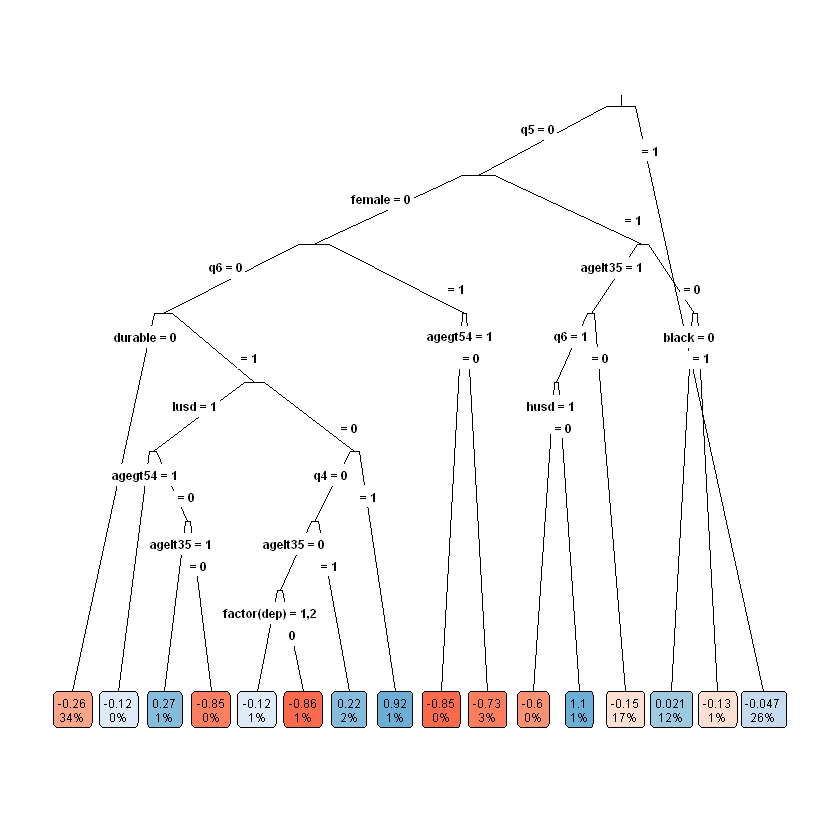

In [79]:
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu") # Palette for coloring the node

We can see that in general the HTE found in the different subgroups are different, that is, the effect of the program in the number of weeks is negative in some groups, and positive in others. We have 16 subgroups, in which the ones related to woman (female==1), have normaly negative or extremely low values of the effect, except for a certain group that has a CATE of 1.1. 